In [21]:

import os, sys
sys.path.append(os.path.curdir+ "/../")

from Visualization.Grid import Grid
from Visualization.MapVisualization import MapVisualization
from GravityModels.SphericalHarmonics import SphericalHarmonics
from CelestialBodies.Planets import Earth
from GravNN.Trajectories.DHGridDist import DHGridDist
from GravityModels.NN_Base import NN_Base
import pyshtools
import matplotlib.pyplot as plt
import numpy as np
from Visualization.MapVizFunctions import * 

Spherical Harmonic Component Error 
=================================================================


In [22]:
    planet = Earth()
    radius = planet.radius+50000.0
    # Specify the grid density via the degree
    trajectory = DHGridDist(planet, radius, degree=175)
    
    # Main 
    Call_gm = SphericalHarmonics(planet.sh_file, degree=None, trajectory=trajectory)
    Call_grid = Grid(gravityModel=Call_gm)

    C20_gm = SphericalHarmonics(planet.sh_file, 2, trajectory=trajectory)
    C20_grid = Grid(gravityModel=C20_gm)

No handles with labels found to put in legend.


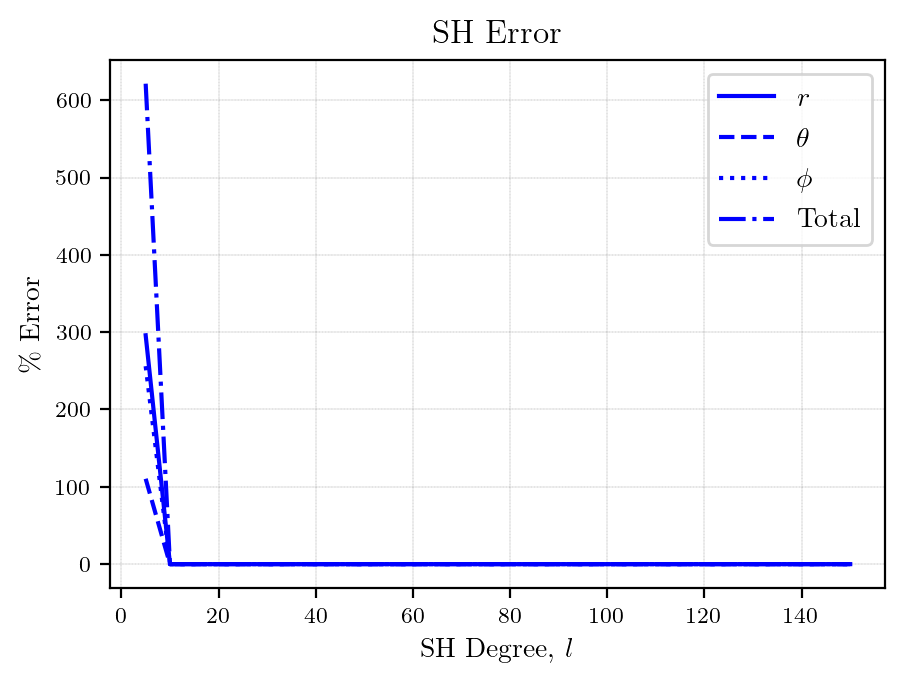

In [20]:

grid_list = []
deg_list = [5, 10, 20, 50, 100, 150]
for i in range(len(deg_list)):
    grid = Grid(gravityModel=SphericalHarmonics(planet.sh_file, deg_list[i], trajectory=trajectory))
    grid_list.append(grid)
fig, ax = component_error(grid_list, Call_grid, deg_list, "blue", C20_grid) 
plt.xlabel(r"SH Degree, $l$")
plt.title("SH Error")
plt.show()

NN Component Error 
======================================================

Set Up NN
------------------------

In [ ]:
nn_list = []
points = [100, 10000, 1000000]
for point_count in points:
    planet = Earth()
    radius = planet.radius + 50000
    trajectory = UniformDist(planet, radius, point_count)
    training_gravity_model = SphericalHarmonics(planet.sh_file, degree=None, trajectory=trajectory)
    training_gravity_model.load() 

    preprocessor = MinMaxTransform()
    preprocessor.percentTest = 0.1
        
    nn = NN_Base(trajectory, training_gravity_model, preprocessor)
    nn.epochs = 1000
    nn.batch_size = 1
    nn.lr = 5E-2
    nn.opt = Adadelta()
    #nn.opt = SGD(lr=nn.lr) 
    #nn.loss = "mean_absolute_percentage_error"

    nn.model_func = Single_128_LReLU
    nn.forceNewNN = False
    nn.trainNN()
    nn.trajectory = trajectory
    nn_list.append(nn)

Plot NN Error
--------------------------

In [ ]:
for i in range(len(nn_list)):
    grid = Grid(gravityModel=nn_list[i])
    grid_list.append(grid)
fig2, ax2 = component_error(grid_list, Call_grid, points, "red", C20_grid) 
plt.xlabel(r"NN Training Points")
plt.title("NN Error w.r.t. C20")
plt.show()

Plot Coef Next to NN
======================================